## 1. Fetching Data

In [1]:
!pip install opendatasets --upgrade --quiet

DEPRECATION: Loading egg at c:\users\aquib\appdata\local\anaconda3\lib\site-packages\huggingface_hub-0.24.7-py3.8.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
import pandas as pd
import os
import opendatasets as od

In [3]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/competitions/goodreads-books-reviews-290312/data'

# Using opendatasets let's download the data sets
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aquibalikhan
Your Kaggle Key: ········


100%|███████████████████████████████████████████████████████████████████████████████| 635M/635M [03:10<00:00, 3.49MB/s]



Extracting archive .\goodreads-books-reviews-290312/goodreads-books-reviews-290312.zip to .\goodreads-books-reviews-290312


## 2. EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing data
df = pd.read_csv("goodreads-books-reviews-290312/goodreads_train.csv")

df.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


### a. Dataset Overview

In [3]:
# Dataset Shape
print("This dataset has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print()

# Checking missing values
print(df.isnull().sum())

This dataset has 900000 rows and 11 columns

user_id              0
book_id              0
review_id            0
rating               0
review_text          0
date_added           0
date_updated         0
read_at          91766
started_at      274297
n_votes              0
n_comments           0
dtype: int64


### b.  Class Distribution

C:\Users\Aquib\AppData\Local\Temp\ipykernel_3964\3570222657.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_count.index, y=class_count.values, palette='viridis')


Text(0, 0.5, 'Count')

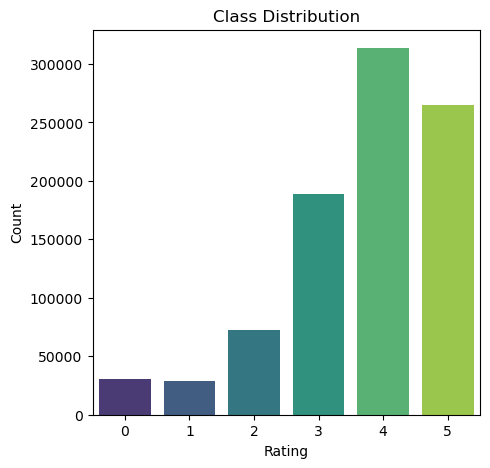

In [4]:
# Counting labels
class_count = df['rating'].value_counts()

plt.figure(figsize=(5, 5))
sns.barplot(x=class_count.index, y=class_count.values, palette='viridis')
plt.title("Class Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")

### c. Text Length

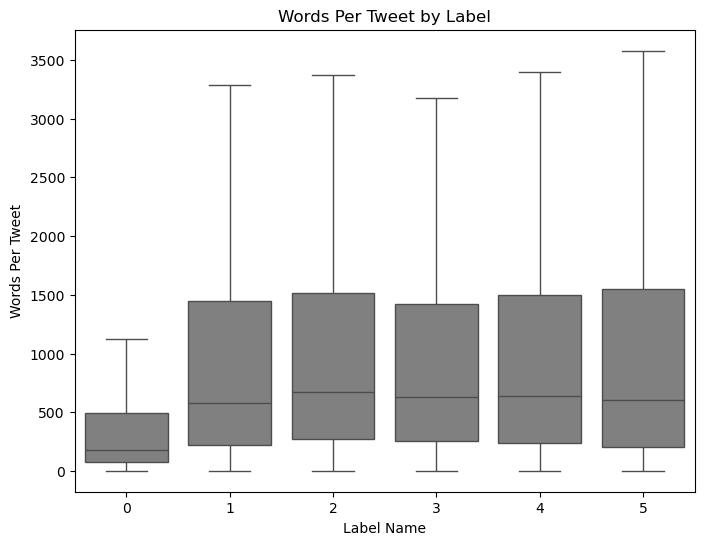

In [5]:
df['text_length'] = df['review_text'].apply(len)

plt.figure(figsize=(8, 6))  # Optional: Set figure size
sns.boxplot(x="rating", y="text_length", data=df, showfliers=False, color="gray")

plt.suptitle("")  # Remove the default title
plt.title("Words Per Tweet by Label")
plt.xlabel("Label Name")
plt.ylabel("Words Per Tweet")
plt.grid(False)  # Turn off grid lines